<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Classification MCQ
© ExploreAI Academy

In this MCQ, we will review and assess our understanding of the core concepts of classifier model selection.

## Learning objectives

By the end of this notebook, you should be able to:
* Build and evaluate multiple types of classification models.

## Introduction

Analysing hate speech and offensive language in tweets

Our dataset consists of 5,600 tweets containing instances of hate speech and offensive language. These tweets have been curated to provide a focused dataset for building sentiment analysis and toxicity detection models. Each tweet reflects varying degrees of negativity, from casual derogatory remarks to explicit expressions of prejudice and intolerance. Each tweet is labelled as 1 for a toxic tweet and 0 for a non-toxic tweet.

By examining this dataset, we aim to understand the prevalence and patterns of hate speech and offensive language in online discourse. Through data analysis, we seek insights into the factors driving such language, as well as its impact on digital communities. Ultimately, our goal is to develop tools and strategies for mitigating the spread of harmful language online and fostering a more inclusive and respectful online environment.

**Note:** It is recommended to run this notebook using **Python version 3.10.14** to ensure consistent results.

In [1]:
import pandas as pd
tweets_df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/toxicity_tweets_cleaned.csv', index_col=0)
tweets_df

,Tweet,Toxicity
43039,i will beat a bitch ass tf,1
36956,thomasnye1 my momma saw how the girls danced a...,1
8373,user user dont forget his other incantation i...,0
27287,isnt it sad how i keep thinking youll change ...,0
56311,please tell this bitch im subbin her ik one of...,1
...,...,...
6429,animaladvocate melodylgattenby zoo says this ...,0
12737,alice doggy my petstagram instapets pet pets d...,0
12503,h a p p y w i n e p a r t y momentoafouna...,0
53172,stupid teabagger restaurant making customers p...,1


## Questions

We are tasked with building multiple classifier models to predict whether a given tweet contains hate speech or offensive language. Our dataset consists of 5,600 tweets, each accompanied by a label indicating whether it expresses toxicity.

The objective is to develop robust machine learning models capable of accurately classifying tweets as toxic or non-toxic based on their content. 

### Question 1

Before we can build our models, we need to first preprocess the text data. Preprocessing involves converting the text into a format that can be easily understood by the algorithms. Use `CountVectorizer` to transform the text data into a matrix where each row represents a tweet and each column represents a unique word in the vocabulary.

After fitting the `CountVectorizer` on the tweet text data and converting the sparse matrix to an array, what is the shape of the resulting array?

**Note**: The order of the options in this notebook will differ from the order in the online (MCQ).

#### Options:

* (14747, 5674)
* (5674, 14747)
* (14747,)
* (1, 14747)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweets_df['Tweet'])  # Use the 'Tweet' column from tweets_df
print(X.toarray().shape)

(5674, 14747)



### Question 2

Split the dataset into training and testing sets using a `70-30 split`. 

Which sklearn function can we use to achieve this?

#### Options:
* `cross_val_score()`
* `train_test_split()`
* `fit_transform()`
* `StandardScaler()`


In [5]:
from sklearn.model_selection import train_test_split

y = tweets_df['Toxicity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### Question 3

What is the shape of the feature training set and the feature testing set, respectively?

* Feature training set shape: (14747, 3971), Feature testing set shape: (14747, 1703)
* Feature training set shape: (1703, 14747), Feature testing set shape: (3971, 14747)
* Feature training set shape: (3971, 14747), Feature testing set shape: (1703, 14747)
* Feature training set shape: (3971, 1703), Feature testing set shape: (14747, 14747)

In [6]:
(X_train.shape, X_test.shape)

((3971, 14747), (1703, 14747))

### Question 4
Now that we have obtained training and testing sets, we want to build multiple classifier models using the training data and evaluate their performance on the testing data. 

Which of the following is not an appropriate classifier model?

* Logistic Regression
* Linear Regression
* Decision Trees
* Random Forest

### Question 5
Which classifier model is known for its ability to handle non-linear decision boundaries by mapping input vectors into high-dimensional feature spaces?

* Logistic Regression
* Decision Tree
* Nearest Neighbors
* Support Vector Classification


### Question 6

What is the k-nearest neighbours algorithm, and how does it work?

* The k-nearest neighbours (KNN) algorithm is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the 'k' nearest data points to a given query point and classifying the query point based on averaging the values of its nearest neighbours.

* The k-nearest neighbours (KNN) algorithm is an unsupervised machine learning algorithm used for clustering tasks. It works by partitioning the data into 'k' clusters such that each data point belongs to the cluster with the nearest centroid.

* The k-nearest neighbours (KNN) algorithm is a supervised machine learning algorithm used for classification tasks. It works by training a model on labelled data points and predicting the class of new data points based on the distance to the 'k' nearest neighbours in the training set.

* The k-nearest neighbours (KNN) algorithm is a dimensionality reduction technique used for feature selection tasks. It works by selecting the 'k' most informative features from the dataset based on their relevance to the target variable.

### Question 7 (Hard)

Build classifier models using the training data and assess their performance on the testing data. Implement the following models: `Logistic Regression`, `Decision Tree`, `Support Vector Classification`, and `Nearest Neighbors`. Evaluate each model's performance using the following evaluation metrics: `accuracy`, `precision`, `recall`, and `F1 score`.

In addition to this, calculate the confusion matrix for each of our models.

Based on the evaluation metrics provided, which classifier model achieves the highest precision on the testing data?

* Decision Tree
* Nearest Neighbors
* Support Vector Classification
* Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Classification': SVC(),
    'Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print("  Accuracy:", accuracy_score(y_test, y_pred))
    print("  Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("  Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("  F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("  Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

Logistic Regression:
  Accuracy: 0.901937756899589
  Precision: 0.9059709734556383
  Recall: 0.901937756899589
  F1 Score: 0.9007144981912687
  Confusion Matrix:
 [[943  34]
 [133 593]]

Decision Tree:
  Accuracy: 0.9007633587786259
  Precision: 0.9007289457860045
  Recall: 0.9007633587786259
  F1 Score: 0.9004777967413946
  Confusion Matrix:
 [[907  70]
 [ 99 627]]

Support Vector Classification:
  Accuracy: 0.8896065766294774
  Precision: 0.8977110557304729
  Recall: 0.8896065766294774
  F1 Score: 0.8874941049308265
  Confusion Matrix:
 [[951  26]
 [162 564]]

Nearest Neighbors:
  Accuracy: 0.7903699354081033
  Precision: 0.7895247343324094
  Recall: 0.7903699354081033
  F1 Score: 0.7892205169290176
  Confusion Matrix:
 [[824 153]
 [204 522]]



### Question 8

Which of the following statements is true about the results of the confusion matrices?

* The Support Vector Classification model has the highest false positive rate, suggesting it is more effective in identifying negative instances (non-toxicity).
* The Support Vector Classification model has the highest true positive rate, suggesting it is more effective in identifying positive instances (toxicity).
* The Nearest Neighbors model has the highest true positive rate, which are instances that were correctly classified as positive (non-toxic) by the model.
* The Decision Tree model has the highest true negative rate, implying it effectively predicts negative instances (non-toxicity) more accurately.

### Question 9
Now that we have trained our models and obtained their predictions on the testing data, we want to visualise the performance of each model. Generate a separate bar chart for each evaluation metric (accuracy, precision, recall, and F1 score) showing the performance of each classifier model.

Based on the provided code snippet, which option correctly fills in the missing code to create a bar chart for each evaluation metric?

#### Options:

* `for metric_name in metric_names:`<br>
  &nbsp;&nbsp;&nbsp;&nbsp;`values = [metric[metric_name]]`
* `for metric_name in metrics:`<br>
    &nbsp;&nbsp;&nbsp;&nbsp;`values = [metric_name[metric] for metric in metric_names]`
* `for metric_name in metric_names:`<br>
    &nbsp;&nbsp;&nbsp;&nbsp;`values = [metric[metric_name] for metric in metrics]`
* `for metric_name in metric_names:`<br>
    &nbsp;&nbsp;&nbsp;&nbsp;`plt.figure(figsize=(8, 5))`

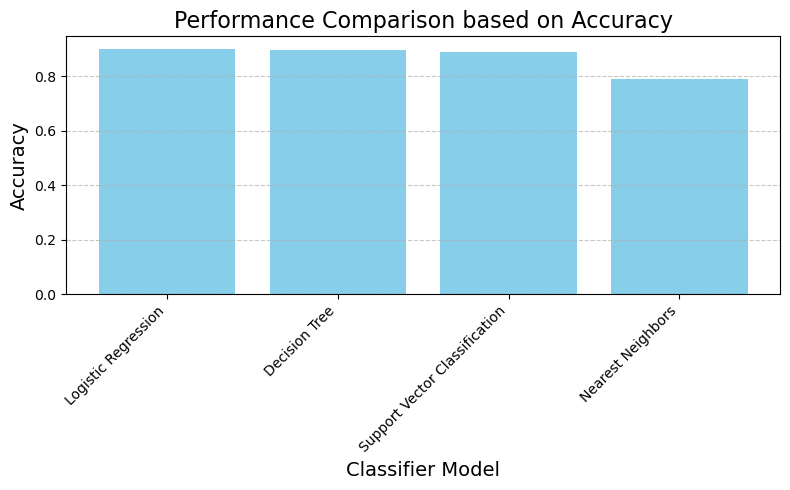

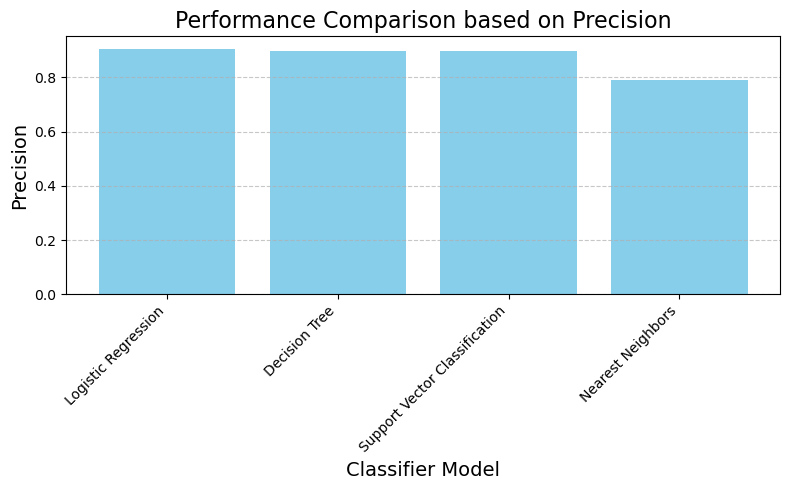

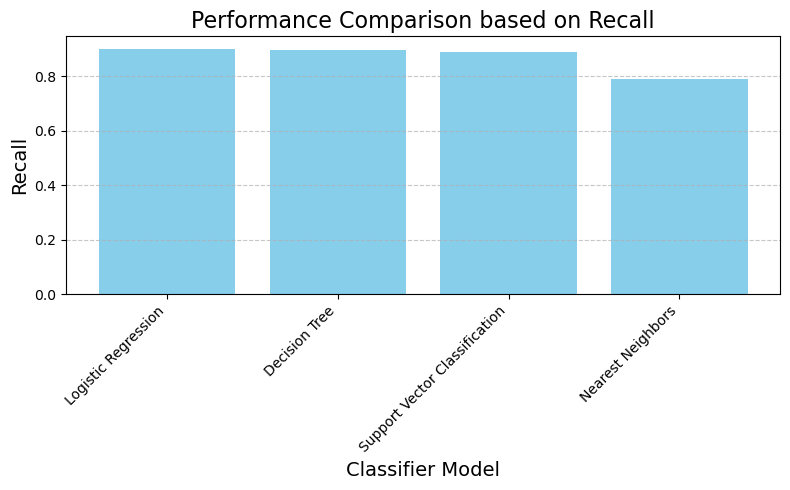

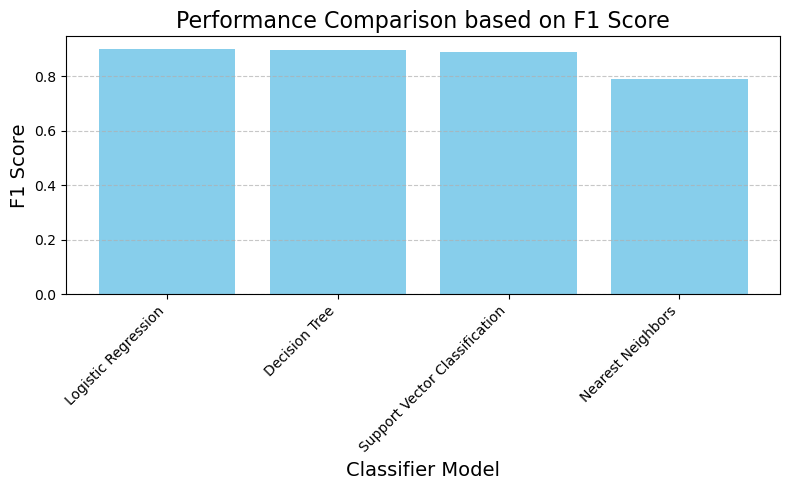

In [11]:
import matplotlib.pyplot as plt

# Extract model names and evaluation metrics
model_names = list(results.keys())
metrics = list(results.values())

# Extract evaluation metric names
metric_names = list(metrics[0].keys())

# Create a bar chart for each evaluation metric
for metric_name in metric_names:
    values = [metric[metric_name] for metric in metrics]


 ### ####   
    plt.figure(figsize=(8, 5))
    plt.bar(model_names, values, color='skyblue')
    plt.title(f"Performance Comparison based on {metric_name}", fontsize=16)
    plt.xlabel("Classifier Model", fontsize=14)
    plt.ylabel(metric_name, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



After evaluating the performance of multiple classifier models, we need to determine the best model based on cross-validation scores. We also want to compare the performance of different models and use hyperparameter tuning to further improve the best model.

### Question 10
Perform 2-fold cross-validation for each classifier model using the training data.

Based on the results, what is the cross-validation scores across the different folds for `Support Vector Classification`?

#### Options:

* [0.89325277, 0.88967254]

* [0.8856999, 0.89118388]

* [0.88418933, 0.87103275]

* [0.79859013, 0.77531486]


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Classification': SVC(),
    'Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=2)
    print(f"{name} 2-fold CV scores: {scores}")

Logistic Regression 2-fold CV scores: [0.89325277 0.88967254]
Decision Tree 2-fold CV scores: [0.88922457 0.89420655]
Support Vector Classification 2-fold CV scores: [0.88418933 0.87103275]
Nearest Neighbors 2-fold CV scores: [0.79859013 0.77531486]


### Question 11
Now, we want to determine the best model based on these scores. Which model should we choose as the best model?

* The model with the highest mean cross-validation score
* The model with the lowest mean cross-validation score
* The model with the highest standard deviation of cross-validation scores
* The model with the lowest standard deviation of cross-validation scores


### Question 12
Based on the previous code that calculates the cross validation scores, which option correctly adjusts the code to calculate the `mean cross-validation score` for each classifier model?


* `cv_scores[name] = scores.cv=2.mean()`
* `cv_scores[name] = scores, mean()`
* `cv_scores[name] = cross_val_score(clf, X_train, y_train.mean(), cv=2)`
* `cv_scores[name] = cross_val_score(clf, X_train, y_train, cv=2).mean()`


### Question 13
Based on the mean cross-validation scores for our models, what can we infer about the performance of the models?

### Options:

* Support Vector Classification has the highest mean cross-validation score, indicating it is the best-performing model among the classifiers.

* Logistic Regression has the highest mean cross-validation score, suggesting it is the most effective model for the given dataset.

* Logistic Regression has the highest mean cross-validation score, suggesting it is the least effective model for the given dataset.

* Nearest Neighbors has the lowest mean cross-validation score, making it the most suitable model for the dataset.


### Question 14

We have identified the best model based on cross-validation scores. Now, we want to further improve the performance of this model by tuning its hyperparameters. Which technique can we use to tune the hyperparameters of a machine learning model?

* K-Fold Cross Validation
* Principal Component Analysis (PCA)
* Grid Search Cross-Validation
* Random Forest Algorithm

### Question 15
Which code snippet correctly applies Grid Search Cross-Validation on our data

* `param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}`<br>
`svc = SVC()`<br>
`random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, n_iter=5, cv=5)`<br>
`random_search.fit(X_train, y_train)`<br>
`best_params = random_search.best_params_`<br>

* `svc = SVC(C=1, kernel='rbf', gamma='auto')`<br>
`scores = cross_val_score(svc, X_train, y_train, cv=5)`

* `param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}`<br>
`svc = SVC()`<br>
`grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)`<br>
`grid_search.fit(X_train, y_train)`<br>
`best_params = grid_search.best_params_`


* `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`<br>
`rf_classifier = RandomForestClassifier()`<br>
`rf_classifier.fit(X_train, y_train)`<br>
`predictions = rf_classifier.predict(X_test)`

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>